In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

Using TensorFlow backend.


In [2]:
data = pd.read_csv('train.csv')
X_train = data.drop('label', axis = 1)
X_train = X_train.values.reshape(-1,28,28,1)
Y_train = data['label']
test = pd.read_csv('test.csv')
test = test.values.reshape(-1, 28, 28, 1)

In [3]:
X_train = X_train/255
test = test/255

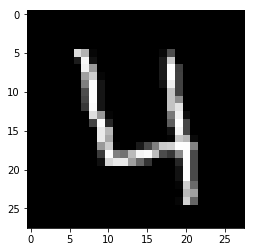

In [4]:
plt.imshow(X_train[3][:, :, 0], cmap = 'gray')

In [5]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 42)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 padding = 'Same', activation ='relu',
                 input_shape = (28,28,1), strides = (1,1)))

model.add(MaxPool2D(pool_size=(2,2), strides = (2, 2)))

model.add(Conv2D(filters = 2, kernel_size = (3, 3),
                 padding = 'Same', activation = 'relu',
                 input_shape = (14, 14, 32), strides = (1, 1)))

model.add(MaxPool2D(pool_size = (2, 2) , strides = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

In [8]:
from keras import optimizers

optmizer = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [9]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=["accuracy"])

In [10]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [12]:
batch_size = 86
epochs = 30
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val), verbose = 1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 28s 740us/step - loss: 0.3653 - accuracy: 0.8883 - val_loss: 0.1870 - val_accuracy: 0.9464
Epoch 2/30
37800/37800 [==============================] - 31s 822us/step - loss: 0.2315 - accuracy: 0.9297 - val_loss: 0.1480 - val_accuracy: 0.9555
Epoch 3/30
37800/37800 [==============================] - 29s 769us/step - loss: 0.1915 - accuracy: 0.9420 - val_loss: 0.1238 - val_accuracy: 0.9633
Epoch 4/30
37800/37800 [==============================] - 28s 740us/step - loss: 0.1661 - accuracy: 0.9503 - val_loss: 0.1103 - val_accuracy: 0.9676
Epoch 5/30
37800/37800 [==============================] - 30s 796us/step - loss: 0.1559 - accuracy: 0.9533 - val_loss: 0.1076 - val_accuracy: 0.9667
Epoch 6/30
37800/37800 [==============================] - 27s 725us/step - loss: 0.1388 - accuracy: 0.9569 - val_loss: 0.1057 - val_accuracy: 0.9671
Epoch 7/30
37800/37800 [==============================] -

In [13]:
model.save('modelo_treinado.h5')